<a href="https://colab.research.google.com/github/yunseo4401/start/blob/master/%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80%2B%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
cereal=pd.read_csv('/content/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [3]:
cereal=cereal[cereal.columns[3:]] #칼럼중 name, mfr,type변수 제외 
cereal=cereal[cereal.sugars>=0] #sugar 0미만 제외 
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<function matplotlib.pyplot.show(*args, **kw)>

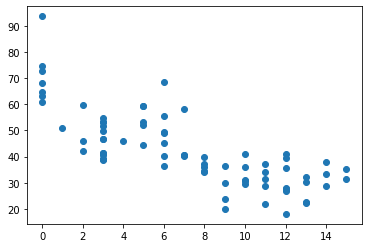

In [4]:
#설탕 함유랑에 따른 영양등급평가를 다항 회귀분석으로 예측할 거임 
#sugar변수와 rating변수 사이의 관계 확인 > 산점도 
import matplotlib.pyplot as plt
cereal2=cereal[['sugars','rating']]
cereal2.sort_values(by=['sugars'],inplace=True)
x=cereal2['sugars'].values
y=cereal2['rating'].values 
plt.scatter(x,y)
plt.show #아래로 볼록한 형태의 산점도가 그려짐 

In [5]:
#데이터 분리 
from sklearn.model_selection import train_test_split 
train_input,test_input,train_target,test_target=train_test_split(x,y,test_size=0.3,random_state=1)

print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(53,) (53,)
(23,) (23,)


In [9]:
#poly데이터를 생성해볼게 교차항과 2차항 포함 데이터로 변환 
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2) # 2차항이니꼐 
x_poly=poly_reg.fit_transform(train_input.reshape(-1,1)) 

#선형회귀모델에 poly데이터 학습 
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(x_poly,train_target)

LinearRegression()

In [12]:
import numpy as np
test_input_poly=poly_reg.transform(test_input.reshape(-1,1))
pred=reg.predict(test_input_poly) #테스트 다항 데이터에 대한 예측값 생성 

np.set_printoptions(precision=2) #소수점 둘째자리까지 표현할겡
print(np.concatenate((pred.reshape(len(pred),1),test_target.reshape(len(test_target),1)),1))



[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error

mse=mean_squared_error(test_target,pred)
mae=mean_absolute_error(test_target,pred)
rmse=np.sqrt(mse)
acc=reg.score(poly_reg.transform(test_input.reshape(-1,1)),test_target)

print(mse)
print(mae)
print(rmse)
print(acc)



33.565110793011044
4.605784071295574
5.793540436815044
0.7437569749767221
